# 사이킷런 활용

## 데이터 적재

사이킷런에서 붓꽃(iris) 품종 관련 데이터셋을 적재한다.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

세 번째 열은 꽃잎의 길이를, 네 번째 열은 꽃잎의 너비를 갖고 있다.

In [2]:
X = iris.data[:, [2, 3]]

붓꽃속 품종은 세토사(setosa), 베르시콜로르(versicolor), 비르지니카(virginica)
세 클래스로 구분되며, 각 클래스의 레이블이 정수로 변환되어 있다.
* 0 = 부채붓꽃(iris setosa), 
* 1 = 붓꽃 베르시콜로르(iris versicolor), 
* 2 = 붓꽃 비르지니카(iris virginica)

<table cellspacing="20">
<tr>
<td>
    <img src="https://thegoodpython.com/assets/images/iris-species.png">
</td>
</tr>
</table>

그림 출처: [The Good Python](https://thegoodpython.com/iris-dataset/)

In [3]:
y = iris.target

부채꽃 품종 레이블은 0, 1, 2 중에 하나임을 아래와 같이 확인한다.

In [4]:
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


150개의 품종 데이터가 저장되어 있다.

In [5]:
len(X)

150

In [6]:
len(y)

150

## 훈련 및 테스트 데이터 분할

데이터를 7대 3으로 분할한다. 
* 훈련 데이터: 70%
* 테스트 데이터: 30%

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

* `random_state`: 무작위 선택 유도
* `Stratify`: 계층화, 즉, 훈련용과 테스용에 사용되는 데이터들의 레이블을 균등하게 맞춤

균등화의 결과는 아래와 같이 확인할 수 있다.

In [8]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


### 데이터 특성 표준화

각 특성마다 다른 평균값($\mu$)와 표준편차($\sigma$)를 표준화한다.
표준화는 머신러닝 알고리즘의 성능을 최상으로 끌어 올린다.

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
X_train_std.mean(), X_train_std.std()

(1.0150610510858574e-16, 0.9999999999999999)

In [11]:
X_test_std.mean(), X_test_std.std()

(-0.024516396323407026, 0.9616054315705168)

## 퍼셉트론 모델 훈련

### 퍼셉트론 모델
* 다중 분류 지원: 일대다(OvR, One-versus-Rest) 방식 활용

세 개의 붓꽃 클래스를 한 번에 주입하여 아래와 같이 퍼셉트론 모델에 맞추어 훈련시킨다.

In [12]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

* eta0: 학습률
    * 너무 높은 학습률: 전역 최소값 놓칠 수 있음
    * 너무 낮은 학습률: 학습 속도가 너무 느려질 수 있음
* max_iter: 에포크(epoch) 실행 횟수, 즉 훈련 반복 횟수 지정.
    * 대규모 데이터셋에서 학습이 수렴할 때까지 많은 에포크(반복 훈련)가 필요할 수 있음.
* random_state: 무작위성 지정. 실행할 때마다 동일한 결과 산출.
* tol: 에포크별 손실(loss)의 차이가 tol 보다 작아지면, 즉, 더 이상 학습율 변화가 더뎌지면 훈련 종료

In [13]:
y_pred = ppn.predict(X_test_std)

In [14]:
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

테스트셋에 대해 잘못 분류된 샘플 개수를 확인해 보자.

In [15]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


정확도가 98%이다.

In [16]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


퍼셉트론 자체에 정확도를 측정하는 기능이 존재한다.

In [17]:
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.98


### 퍼셉트론 모델 분류 그래프

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [20]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

표준화된 훈련 데이터를 사용하여 퍼셉트론 모델을 훈련한 후 그래프를 그린다.

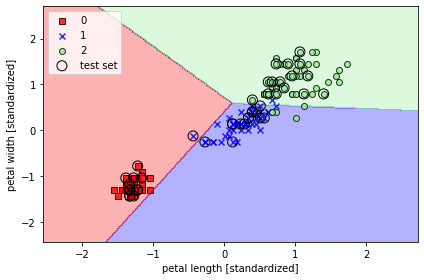

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론 모델은 선형으로 구분하지 못하는 경우 학습 정도가 수렴하지 않을 수 있다.
앞서 예제도 에포크마다 적어도 하나의 샘플이 잘못 분류된다.
즉, 훈련셋에 대해 잘 작동하지 않는다.

선형 이진 분류 문제의 경우 로지스틱 회귀 모델이 보다 적절하다. 
퍼셉트론 모델처럼 일대다(OvR) 방식을 사용하여 다중 분류를 지원한다.

### 시그모이드 곡선

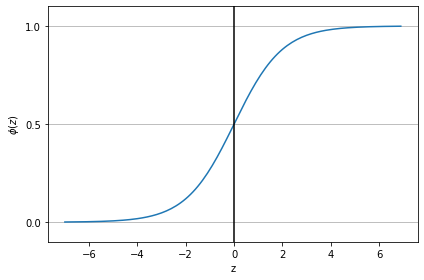

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 로지스틱 회귀 모델 훈련하기

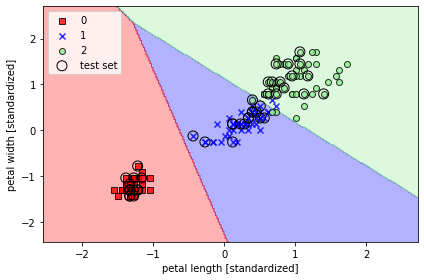

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

샘플이 어떤 클래스에 속할 확률을 구해보자.
예를 들어, 테스트셋의 첫 3개 샘플이 각각의 붓꽃 클래스에 속할 확률은 다음과 같다.

In [24]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

행별로 확률의 합은 항상 1이다.

In [25]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

가장 큰 확률값을 갖는 칸을 확인해보자.

In [26]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [27]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

즉, 테스트셋 처음 세 개 샘플은 각각 2번, 0번, 0번 클래스에 속할 확률이 가장 크다.

# 서포트 벡터 머신을 사용한 최대 마진 분류

서포트 벡터 머신(Support Vector Machine, SVM) 모델은 
소위 **마진**을 최대화하는 방법이다. 
마진은 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리를 
가리킨다. 
이런 샘플을 서포트 벡터라 부른다. 

<table cellspacing="20">
<tr>
<td>
<img src="../images/svm01.png">
</td>
</tr>
</table>

그림 출처: Python machine learning, S. Raschka

양성 쪽 초평면과 음성 쪽 초평면의 거리가 마진이며, 이 마진을 최대화 시키려고 시도하는 모델이다.

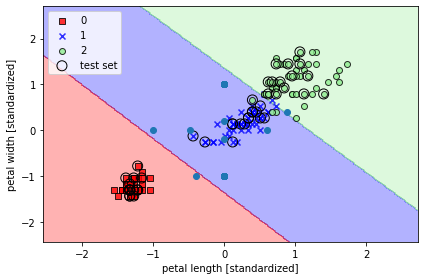

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 커널 SVM을 사용하여 비선형 문제 풀기

아래 그림에 나타난 두 부류의 데이터를 분류해보자.
우선 선형적으로 분류할 수 없음을 알 수 있다.

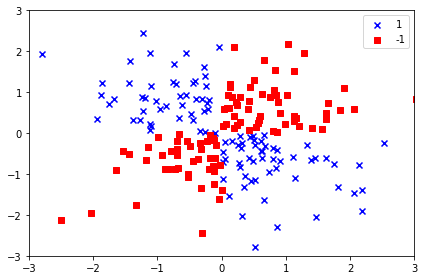

In [29]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

SVM은 비선형 문제도 다룰 수 있으며, 이를 위해 커널 기법을 활용한다. 

<table cellspacing="20">
<tr>
<td>
<img src="../images/svm02.png">
</td>
</tr>
</table>

그림 출처: Python machine learning, S. Raschka

커널 SVM을 활용하여 위 데이터를 분류하면 다음과 같다.

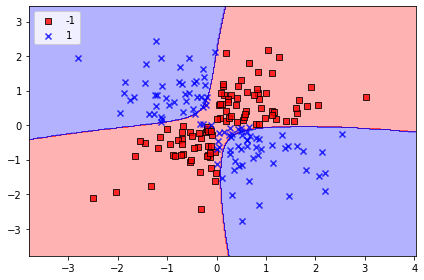

In [30]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

커널 SVM을 붓꽃 데이터에 활용하면 다음 결과를 얻는다.

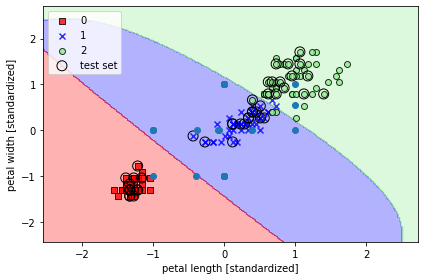

In [31]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()